# Лабораторная работа №5. Ансабли моделей машинного обучения.

## Подготовка набора данных

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

In [4]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [5]:
def get_metrics(model, X_test, y_test, predicted):
    plot_confusion_matrix(model, X_test, y_test, 
                      display_labels=['Bad', 'Good'], cmap=plt.cm.Blues)
    print_accuracy_score_for_classes(y_test, predicted)
    plot_roc_curve(model, X_test, y_test)

In [6]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(test_x, data_clear_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = test_x.iloc[:, 0], test_x.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=data_clear_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Sulphates')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [7]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [8]:
data = pd.read_csv('data/winequality-red.csv', sep=',')

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Преобразуем целевой признак для задачи регрессии в признак для решения задачи классификации.
def regr_to_class(y: int) -> int:
    if y<6:
        result = 0
    else:
        result = 1        
    return result 

In [12]:
data['Q'] = \
data.apply(lambda row: regr_to_class(row['quality']),axis=1)

In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaller_1 = MinMaxScaler()
data['fixed acidity'] = scaller_1.fit_transform(data[['fixed acidity']])
scaller_2 = MinMaxScaler()
data['volatile acidity'] = scaller_2.fit_transform(data[['volatile acidity']])
scaller_3 = MinMaxScaler()
data['residual sugar'] = scaller_3.fit_transform(data[['residual sugar']])
scaller_4 = MinMaxScaler()
data['chlorides'] = scaller_4.fit_transform(data[['chlorides']])
scaller_5 = MinMaxScaler()
data['free sulfur dioxide'] = scaller_5.fit_transform(data[['free sulfur dioxide']])
scaller_6 = MinMaxScaler()
data['total sulfur dioxide'] = scaller_6.fit_transform(data[['total sulfur dioxide']])
scaller_7 = MinMaxScaler()
data['pH'] = scaller_7.fit_transform(data[['pH']])
scaller_8 = MinMaxScaler()
data['sulphates'] = scaller_8.fit_transform(data[['sulphates']])
scaller_9 = MinMaxScaler()
data['alcohol'] = scaller_9.fit_transform(data[['alcohol']])

In [16]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Q
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,5,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.9968,0.362205,0.209581,0.215385,5,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.9970,0.409449,0.191617,0.215385,5,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.9980,0.330709,0.149701,0.215385,6,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,5,0


In [17]:
data_clear = data.drop('quality', 1)

In [18]:
data_clear.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Q
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.9968,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.9970,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.9980,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.9978,0.606299,0.137725,0.153846,0


<AxesSubplot:>

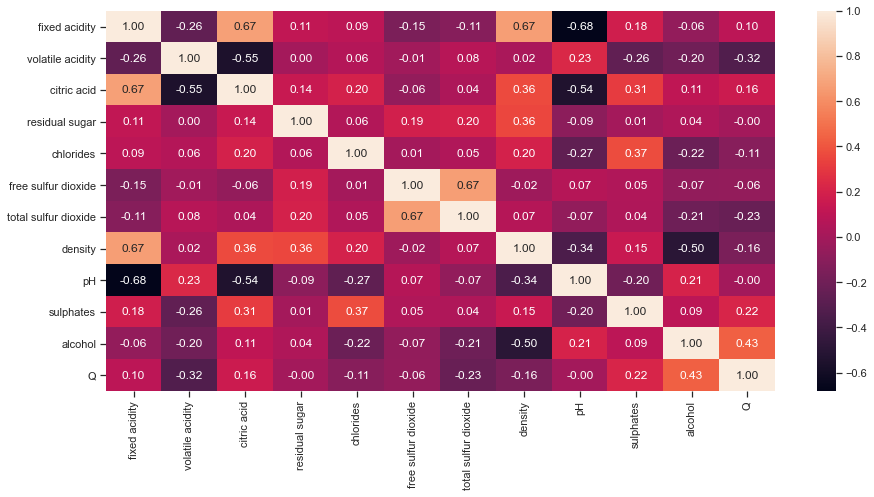

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data_clear.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [20]:
data_clear_copy = data_clear

In [21]:
data_clear_x = data_clear.drop('Q', 1)

In [22]:
data_clear_y = data_clear['Q']
data_clear_y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: Q, Length: 1599, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
vine_X_train, vine_X_test, vine_y_train, vine_y_test = train_test_split(data_clear_x, data_clear_y, test_size = 0.3, random_state = 3)

In [25]:
# Размер обучающей выборки
vine_X_train.shape, vine_y_train.shape

((1119, 11), (1119,))

In [26]:
# Размер тестовой выборки
vine_X_test.shape, vine_y_test.shape

((480, 11), (480,))

In [27]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [28]:
# В обучающей выборке
print_class_proportions(vine_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 523 	 	 46.74%
1 	 596 	 	 53.26%


In [29]:
# В тестовой выборке
print_class_proportions(vine_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 221 	 	 46.04%
1 	 259 	 	 53.96%


## 1) Случайный лес

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Создадим модель для подбора
model_forest_for_selection = RandomForestClassifier(random_state=1)

In [32]:
distibutions = dict(n_estimators = [10, 25, 45, 50, 100, 120, 130],
                    max_depth = [2, 3, 4, 5, 6, 7],
                    criterion = ['gini', 'entropy'])

In [33]:
forest_selection = GridSearchCV(model_forest_for_selection, distibutions)

In [34]:
forest_selection_result = forest_selection.fit(data_clear_x, data_clear_y)

In [35]:
forest_selection_result.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}

In [36]:
model_forest_optimal = forest_selection_result.best_estimator_

In [37]:
model_forest_optimal.fit(data_clear_x, data_clear_y)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=1)

In [38]:
pred_test_from_forest_optimal = model_forest_optimal.predict(vine_X_test)
pred_test_from_forest_optimal

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

Метка 	 Accuracy
0 	 0.832579185520362
1 	 0.806949806949807


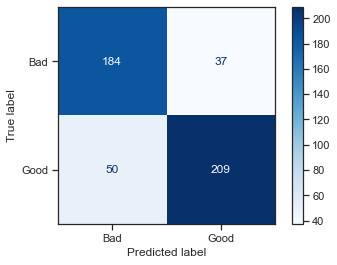

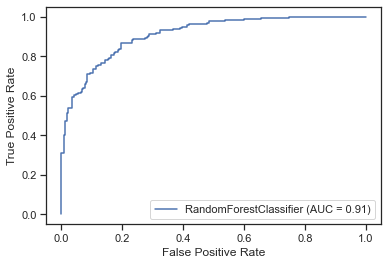

In [39]:
get_metrics(model_forest_optimal, vine_X_test, vine_y_test, pred_test_from_forest_optimal)

In [40]:
list(zip(data_clear_x.columns.values, model_forest_optimal.feature_importances_))

[('fixed acidity', 0.039260317365134696),
 ('volatile acidity', 0.13496594776252624),
 ('citric acid', 0.037663185535762575),
 ('residual sugar', 0.02815917794873651),
 ('chlorides', 0.05091097021602587),
 ('free sulfur dioxide', 0.024845140986820703),
 ('total sulfur dioxide', 0.11011042176613678),
 ('density', 0.08475983142823368),
 ('pH', 0.032026962314223584),
 ('sulphates', 0.1847687888234089),
 ('alcohol', 0.2725292558529906)]

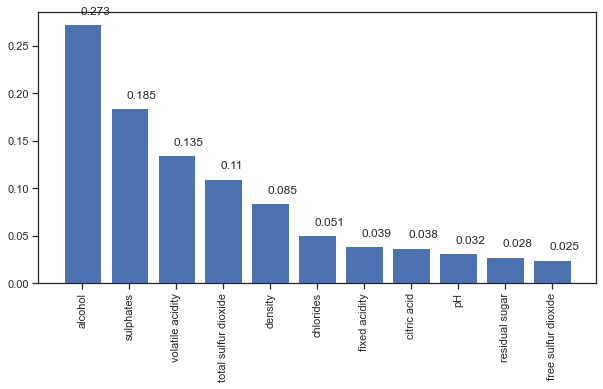

In [41]:
# Важность признаков
model_forest_optimal_fl, model_forest_optimal_fd = draw_feature_importances(model_forest_optimal, data_clear_x)

In [42]:
test_x = data_clear_x[['alcohol', 'sulphates']]
test_x

,alcohol,sulphates
0,0.153846,0.137725
1,0.215385,0.209581
2,0.215385,0.191617
3,0.215385,0.149701
4,0.153846,0.137725
...,...,...
1594,0.323077,0.149701
1595,0.430769,0.257485
1596,0.400000,0.251497
1597,0.276923,0.227545


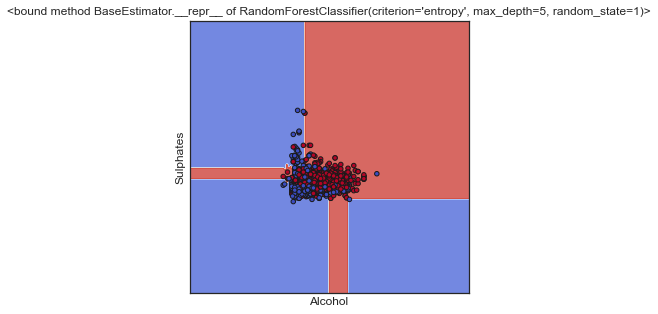

In [43]:
# Взяли лишь два самых важных признака: содержание алкоголя и сульфатов
plot_cl(RandomForestClassifier(criterion='entropy', max_depth=5, random_state=1))

## 2) Градиентный бустинг. Библиотека CatBoost от "Яндекс"

In [44]:
from catboost import CatBoostClassifier, Pool

In [45]:
model_boost_1 = CatBoostClassifier()

In [46]:
model_boost_1.fit(data_clear_x, data_clear_y)

Learning rate set to 0.012589
0:	learn: 0.6883560	total: 69.1ms	remaining: 1m 9s
1:	learn: 0.6838591	total: 71.3ms	remaining: 35.6s
2:	learn: 0.6790971	total: 73.7ms	remaining: 24.5s
3:	learn: 0.6735032	total: 75.6ms	remaining: 18.8s
4:	learn: 0.6692937	total: 77.5ms	remaining: 15.4s
5:	learn: 0.6649637	total: 79.2ms	remaining: 13.1s
6:	learn: 0.6613131	total: 81ms	remaining: 11.5s
7:	learn: 0.6576062	total: 82.7ms	remaining: 10.3s
8:	learn: 0.6537282	total: 84.4ms	remaining: 9.29s
9:	learn: 0.6497350	total: 85.9ms	remaining: 8.51s
10:	learn: 0.6456993	total: 87.8ms	remaining: 7.89s
11:	learn: 0.6421598	total: 90.6ms	remaining: 7.46s
12:	learn: 0.6386707	total: 92.6ms	remaining: 7.03s
13:	learn: 0.6348384	total: 94.4ms	remaining: 6.65s
14:	learn: 0.6312710	total: 96.1ms	remaining: 6.31s
15:	learn: 0.6279929	total: 97.9ms	remaining: 6.02s
16:	learn: 0.6244419	total: 99.6ms	remaining: 5.76s
17:	learn: 0.6210982	total: 101ms	remaining: 5.53s
18:	learn: 0.6176742	total: 104ms	remaining: 5.

In [48]:
pred_test_from_boost = model_boost_1.predict(vine_X_test)

Метка 	 Accuracy
0 	 0.9230769230769231
1 	 0.9382239382239382


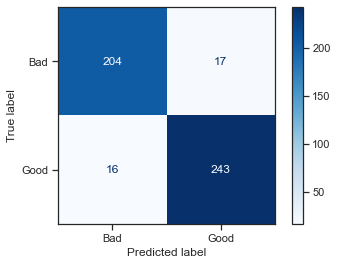

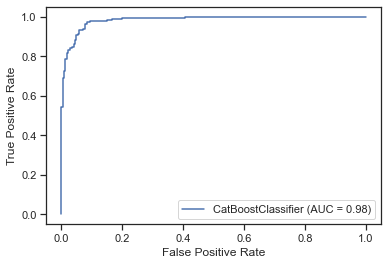

In [49]:
get_metrics(model_boost_1, vine_X_test, vine_y_test, pred_test_from_boost)

In [52]:
model_boost_1.get_feature_importance(prettified = True)

,Feature Id,Importances
0,alcohol,18.035111
1,sulphates,13.959705
2,total sulfur dioxide,11.010906
3,volatile acidity,9.310871
4,chlorides,8.245410
5,density,7.478118
6,citric acid,7.196225
7,pH,7.124488
8,fixed acidity,5.903332
9,residual sugar,5.872011


Learning rate set to 0.012589
0:	learn: 0.6891982	total: 2.27ms	remaining: 2.27s
1:	learn: 0.6848280	total: 4.34ms	remaining: 2.17s
2:	learn: 0.6807425	total: 6.03ms	remaining: 2s
3:	learn: 0.6768701	total: 7.41ms	remaining: 1.84s
4:	learn: 0.6730845	total: 8.84ms	remaining: 1.76s
5:	learn: 0.6692844	total: 10.3ms	remaining: 1.71s
6:	learn: 0.6652861	total: 11.8ms	remaining: 1.67s
7:	learn: 0.6619538	total: 13.7ms	remaining: 1.69s
8:	learn: 0.6584451	total: 15.8ms	remaining: 1.74s
9:	learn: 0.6548617	total: 19.6ms	remaining: 1.94s
10:	learn: 0.6515704	total: 21.1ms	remaining: 1.9s
11:	learn: 0.6484642	total: 22.8ms	remaining: 1.87s
12:	learn: 0.6454222	total: 24.3ms	remaining: 1.85s
13:	learn: 0.6423491	total: 26ms	remaining: 1.83s
14:	learn: 0.6391807	total: 27.3ms	remaining: 1.79s
15:	learn: 0.6365695	total: 28.9ms	remaining: 1.77s
16:	learn: 0.6336294	total: 30.4ms	remaining: 1.76s
17:	learn: 0.6309636	total: 31.7ms	remaining: 1.73s
18:	learn: 0.6283755	total: 33.1ms	remaining: 1.71

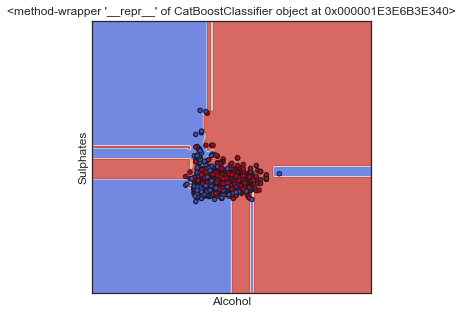

In [50]:
plot_cl(CatBoostClassifier())

Можно сделать вывод, что в данном наборе наиболее хорошо сработал метод гариентного бустинга, следовательно, метод случайного леса проиграл - следовательно переобучения в наборе нет, а сам набор содержит сложные зависимости.